In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
#Creating dataframe from csv file
df = pd.read_csv('citation_cumsum.csv')
df.drop(columns=['cited_subcategory_id'], inplace=True)
df.head()

#Read in subcategory labels
subcategories = pd.read_csv('Citation_data/nber_subcategory.tsv', delimiter="\t").set_index('id')

In [3]:
#Create dictionary of node weights
node_weights = dict()
row_number = 0
for node in list(df.columns):
    node_weights[node] = df.at[row_number, node]
    row_number += 1
print(node_weights)

{'11.0': 54397.0, '12.0': 198870, '13.0': 128978.0, '14.0': 249712, '15.0': 567106.0, '19.0': 2089469.0, '21.0': 3407899, '22.0': 2559830, '23.0': 808556, '24.0': 1303659, '25.0': 754633, '31.0': 1616664, '32.0': 4465029, '33.0': 67152.0, '39.0': 594492.0, '41.0': 795397.0, '42.0': 478940.0, '43.0': 670097.0, '44.0': 325938, '45.0': 1094896, '46.0': 1910726, '49.0': 686175, '51.0': 783994.0, '52.0': 328012.0, '53.0': 709986.0, '54.0': 408838, '55.0': 750593, '59.0': 1113577.0, '61.0': 424898, '62.0': 685177, '63.0': 309460.0, '64.0': 642054.0, '65.0': 517552.0, '66.0': 166618.0, '67.0': 127906.0, '68.0': 387990.0, '69.0': 1676400, '70.0': 0.0}


In [4]:
#Create graph and add nodes
G = nx.MultiDiGraph()
G.clear()
for node in list(df.columns):
    G.add_node(node, weight=node_weights[node])
list(G.nodes(data=True))

[('11.0', {'weight': 54397.0}),
 ('12.0', {'weight': 198870}),
 ('13.0', {'weight': 128978.0}),
 ('14.0', {'weight': 249712}),
 ('15.0', {'weight': 567106.0}),
 ('19.0', {'weight': 2089469.0}),
 ('21.0', {'weight': 3407899}),
 ('22.0', {'weight': 2559830}),
 ('23.0', {'weight': 808556}),
 ('24.0', {'weight': 1303659}),
 ('25.0', {'weight': 754633}),
 ('31.0', {'weight': 1616664}),
 ('32.0', {'weight': 4465029}),
 ('33.0', {'weight': 67152.0}),
 ('39.0', {'weight': 594492.0}),
 ('41.0', {'weight': 795397.0}),
 ('42.0', {'weight': 478940.0}),
 ('43.0', {'weight': 670097.0}),
 ('44.0', {'weight': 325938}),
 ('45.0', {'weight': 1094896}),
 ('46.0', {'weight': 1910726}),
 ('49.0', {'weight': 686175}),
 ('51.0', {'weight': 783994.0}),
 ('52.0', {'weight': 328012.0}),
 ('53.0', {'weight': 709986.0}),
 ('54.0', {'weight': 408838}),
 ('55.0', {'weight': 750593}),
 ('59.0', {'weight': 1113577.0}),
 ('61.0', {'weight': 424898}),
 ('62.0', {'weight': 685177}),
 ('63.0', {'weight': 309460.0}),
 ('6

In [5]:
#Add edges with weights
row_number = 0
for node_1 in list(df.columns):
    for node_2 in list(df.columns):
        if str(node_1) != str(node_2):
            G.add_edge(node_1, node_2, weight=df.at[row_number, node_2])
    row_number += 1

#Check that weights have been added correctly by testing a subset        
for (u, v, wt) in G.edges.data('weight'):
    if int(wt) == 0:
        print(f"({u}, {v}, {wt})")

(13.0, 70.0, 0.0)
(42.0, 70.0, 0.0)
(63.0, 33.0, 0.0)
(63.0, 70.0, 0.0)
(64.0, 70.0, 0.0)
(66.0, 70.0, 0.0)
(67.0, 33.0, 0.0)
(70.0, 11.0, 0.0)
(70.0, 13.0, 0.0)
(70.0, 15.0, 0.0)
(70.0, 19.0, 0.0)
(70.0, 33.0, 0.0)
(70.0, 39.0, 0.0)
(70.0, 41.0, 0.0)
(70.0, 42.0, 0.0)
(70.0, 43.0, 0.0)
(70.0, 51.0, 0.0)
(70.0, 52.0, 0.0)
(70.0, 53.0, 0.0)
(70.0, 59.0, 0.0)
(70.0, 63.0, 0.0)
(70.0, 64.0, 0.0)
(70.0, 65.0, 0.0)
(70.0, 66.0, 0.0)
(70.0, 67.0, 0.0)
(70.0, 68.0, 0.0)


In [6]:
#Customize node and edge sizes according to size of internal and external linkage
row_number = 0
size_list = []
edge_list = []
for node in list(df.columns):
    size_list.append(abs((df.at[row_number, node])**(1/1.8)) + 100)
    row_number += 1
print(size_list)


# Labels for nodes -- to come later when all numbers have an applicable label
labels={}
labels[11]="Agriculture,Food,Textiles"    
# nx.draw_networkx_labels(G,pos,labels,font_size=9)
print(labels)

[527.4398134688881, 978.3135777651519, 790.5185574503977, 1096.7298201763829, 1672.0998799398658, 3344.375203364958, 4357.5453846612045, 3731.761257323396, 2014.525560892734, 2596.3951912386347, 1942.505419025952, 2913.411149178037, 5047.055975683728, 580.5066668328591, 1713.8341345532633, 1997.152286921412, 1531.2375692042997, 1824.8175084580416, 1255.7203907381434, 2365.724753983978, 3187.128264786872, 1847.6876943183663, 1981.9937998453295, 1259.8002140905267, 1881.12469473946, 1410.7759821821628, 1937.0188664743969, 2387.120407839884, 1439.1364338351095, 1846.2750675975242, 1222.8864601549146, 1784.3356552460427, 1594.234928321316, 896.0798302330775, 787.3241771522488, 1373.2107468033835, 2970.698514280868, 100.0]
{11: 'Agriculture,Food,Textiles'}


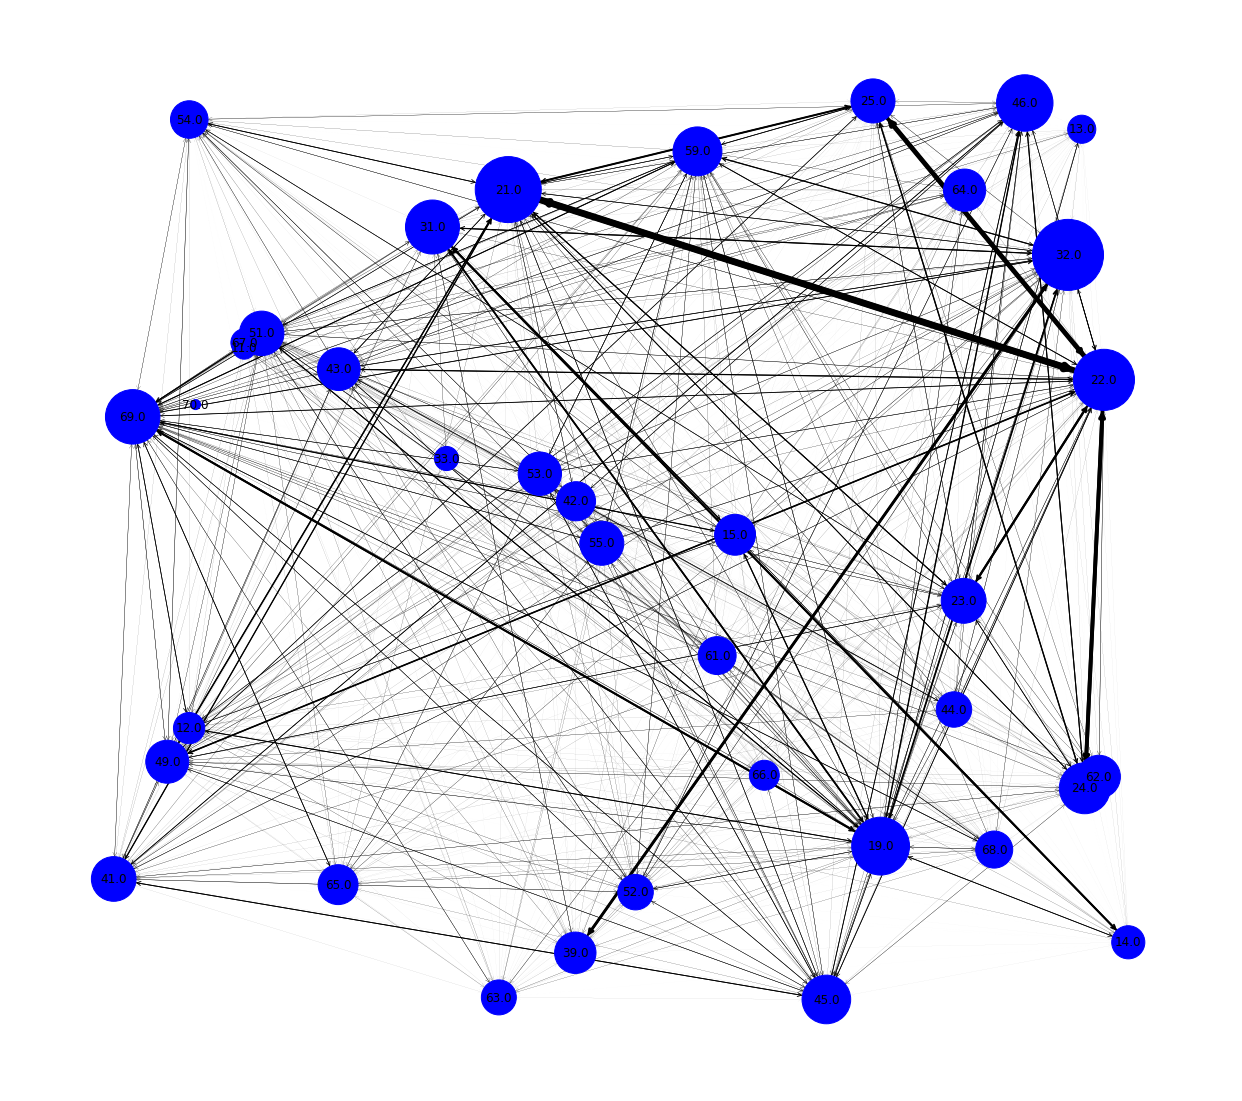

In [7]:
#Run a couple times for a properly spaced graph
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

#Set figure size
from matplotlib.pyplot import figure
figure(figsize=(22, 20))

#Need a better way to figure out positioning other than crossing fingers; its the 70 category that is
#consistently an outlier. See documentation on https://networkx.org/documentation/stable/reference/drawing.html
pos = nx.layout.random_layout(G)

#Getting edge weights to do some weight calculations on them
_,edge_weight = zip(*nx.get_edge_attributes(G,'weight').items())
edge_weight = list(edge_weight)

edge_weight_width = [i/100000 for i in edge_weight]

nodes = nx.draw_networkx_nodes(G, pos, node_size=size_list, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=size_list,
    arrowstyle="->",
    arrowsize=10,
    edge_color= "black",
    edge_cmap=plt.cm.Greys,
    width= edge_weight_width,
)
labels = nx.draw_networkx_labels(G, pos)

ax = plt.gca()
ax.set_axis_off()
plt.show()

[Text(0.5, 1, 'Agriculture,Food,Textiles'),
 Text(1.5, 1, 'Coating'),
 Text(2.5, 1, 'Gas'),
 Text(3.5, 1, 'Organic Compounds'),
 Text(4.5, 1, 'Resins'),
 Text(5.5, 1, 'Miscellaneous'),
 Text(6.5, 1, 'Communications'),
 Text(7.5, 1, 'Computer Hardware & Software'),
 Text(8.5, 1, 'Computer Peripherials'),
 Text(9.5, 1, 'Information Storage'),
 Text(10.5, 1, 'Electronic business methods and software'),
 Text(11.5, 1, 'Drugs'),
 Text(12.5, 1, 'Surgery & Med Inst.'),
 Text(13.5, 1, 'Genetics'),
 Text(14.5, 1, 'Miscellaneous'),
 Text(15.5, 1, 'Electrical Devices'),
 Text(16.5, 1, 'Electrical Lighting'),
 Text(17.5, 1, 'Measuring & Testing'),
 Text(18.5, 1, 'Nuclear & X-rays'),
 Text(19.5, 1, 'Power Systems'),
 Text(20.5, 1, 'Semiconductor Devices'),
 Text(21.5, 1, 'Miscellaneous'),
 Text(22.5, 1, 'Mat. Proc & Handling'),
 Text(23.5, 1, 'Metal Working'),
 Text(24.5, 1, 'Motors & Engines + Parts'),
 Text(25.5, 1, 'Optics'),
 Text(26.5, 1, 'Transportation'),
 Text(27.5, 1, 'Miscellaneous'),
 Te

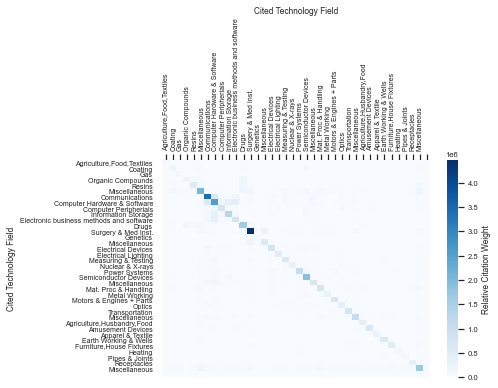

In [19]:
#Visualize the heatmap
#figure(figsize=(10,10))
hm = sns.heatmap(df, cmap="Blues", xticklabels=True, yticklabels=True)
hm.set_ylabel("Cited Technology Field")
hm.set_xlabel("Cited Technology Field")
hm.xaxis.set_ticks_position('top')
hm.xaxis.set_label_position('top')
hm.collections[0].colorbar.set_label("Relative Citation Weight")
sns.set(font_scale=.7)
plt.xticks(rotation=90)
hm.set_yticklabels(subcategories.title,
                   size = 7)
hm.set_xticklabels(subcategories.title,
                   size = 7)
plt.show()

In [33]:
#Mins and maxs
min_value = min(node_weights.values())
min_keys = [k for k, v in node_weights.items() if v == min_value]
print(min_value, min_keys)
max_value = max(node_weights.values())
max_keys = [k for k, v in node_weights.items() if v == max_value]
print(max_value, max_keys)

min_value = min(edge_weight)
max_value = max(edge_weight)
print(max_value, max_keys)

0.0 ['70.0']
4465029 ['32.0']
680933 ['32.0']
